# Basic Multifactor Investment Strategy
### Comparing Performance of Deep Learning to Linear Regression using Nonlinear Data

## Outline  
1. Import Data
2. Process Data
3. Design Deep Learning Factor Model  
    a. Train and Test Factor Model  
4. Design Linear Regression Factor Model  
    a. Train and Test Factor Model  
5. Compare Results

### Dependencies
- #### Data:  
    - Data - Multifactor Investment Model.csv


# 1. Import Data  


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns  # For graphs

Import Multifactor Dataset

In [2]:
df = pd.read_csv (r'Data - Multifactor Investment Model.csv')

This dataset consists of 2 factors (value and momentum) and 1 target variable (stock return) 

In [3]:
df.set_index('Date', inplace=True)
df

,Stk_ret,Value,Momentum
Date,,,
1920-01-31,NaN,-0.019278,-0.092309
1920-02-29,-1.186592,0.158030,0.055114
1920-03-31,1.543853,0.210958,0.283385
1920-04-30,0.700399,0.309410,0.367430
1920-05-31,1.158359,0.444353,0.387700
...,...,...,...
2019-08-31,-2.282638,-0.510057,-0.476348
2019-09-30,-0.840917,-0.292859,-0.436300
2019-10-31,-1.167976,-0.314273,-0.318393


In [4]:
df.Stk_ret = df.Stk_ret.shift(-1)
df.dropna(inplace=True)

# 2. Process Data

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


### Clean Data

For this example, there are no missing data and no outliers.  We will cover data cleaning in later examples.

### Split data into training and testing datasets
X = factors and y = target

In [6]:
X = df[['Value', 'Momentum']]
y = df['Stk_ret']


In [7]:
fraction_test = 0.2  # fraction of total dataset that is used for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=fraction_test, shuffle=False)

Summary Statistics of X_train

In [8]:
X_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Value,959.0,-0.001474,0.710339,-1.169743,-0.704737,0.007987,0.691822,1.106773
Momentum,959.0,-0.002449,0.712224,-1.448033,-0.512127,0.007297,0.516643,1.479220


Summary Statistics of y_train

In [9]:
y_train.describe()

count    959.000000
mean       0.000016
std        1.602790
min       -4.179356
25%       -1.219279
50%        0.049292
75%        1.221054
max        4.301543
Name: Stk_ret, dtype: float64

Correlation matrix of Training Data

In [10]:
train_data = pd.concat([y_train, X_train], axis=1)

corr_train = train_data.corr()
corr_train

,Stk_ret,Value,Momentum
Stk_ret,1.000000,0.522661,0.091684
Value,0.522661,1.000000,-0.596559
Momentum,0.091684,-0.596559,1.000000


Correlation Matrix


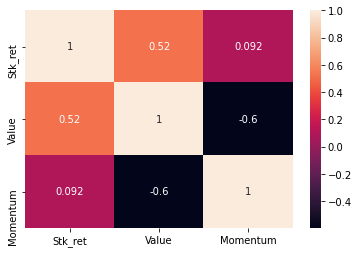

In [11]:
print('Correlation Matrix')
sns.heatmap(corr_train, annot=True)
plt.show()

Pairplots


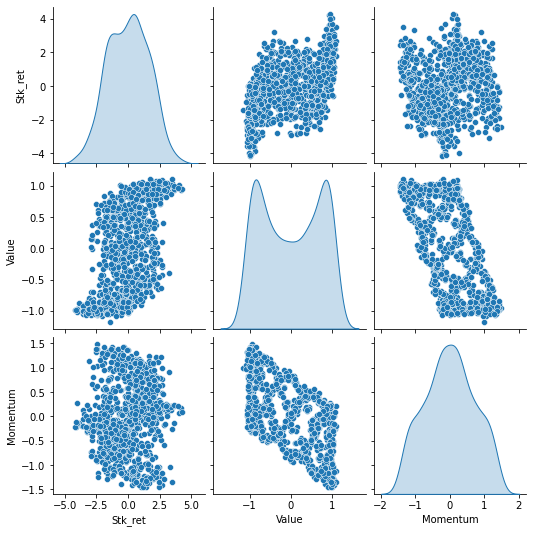

In [12]:
print('Pairplots')
sns.pairplot(train_data, diag_kind='kde')
plt.show()

### Scale data

For this example, the data will not be scaled.  We will cover scaling in later examples.

# 3. Design Deep Learning Factor Model to Forecast Returns

In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

from sklearn.metrics import r2_score

### Basic Feed Forward Network Using Keras

In [14]:
model_dl = Sequential()
model_dl.add(Dense(100, input_dim=X_train.shape[1], activation='relu'))
model_dl.add(Dropout(0.3))
model_dl.add(Dense(100, activation='relu'))
model_dl.add(Dropout(0.3))
model_dl.add(Dense(50, activation='relu'))
model_dl.add(Dense(1,))


In [15]:
model_dl.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               300       
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 51        
Total params: 15,501
Trainable params: 15,501
Non-trainable params: 0
____________________________________________________

In [16]:
model_dl.compile(Adam(learning_rate =0.05), 'mean_squared_error')

### Train and Test Deep Learning Factor Model

In [17]:
history = model_dl.fit(X_train, y_train, 
                    epochs = 80, 
                    validation_split = 0.2,
                    verbose = 2)


Epoch 1/80
24/24 - 0s - loss: 2.4393 - val_loss: 1.4195
Epoch 2/80
24/24 - 0s - loss: 1.6979 - val_loss: 1.2378
Epoch 3/80
24/24 - 0s - loss: 1.3180 - val_loss: 1.2186
Epoch 4/80
24/24 - 0s - loss: 1.1747 - val_loss: 0.9429
Epoch 5/80
24/24 - 0s - loss: 1.1635 - val_loss: 0.8815
Epoch 6/80
24/24 - 0s - loss: 1.1421 - val_loss: 0.8265
Epoch 7/80
24/24 - 0s - loss: 1.1191 - val_loss: 0.8393
Epoch 8/80
24/24 - 0s - loss: 1.1391 - val_loss: 0.8706
Epoch 9/80
24/24 - 0s - loss: 1.1816 - val_loss: 0.9392
Epoch 10/80
24/24 - 0s - loss: 1.0479 - val_loss: 0.7913
Epoch 11/80
24/24 - 0s - loss: 0.9783 - val_loss: 0.9837
Epoch 12/80
24/24 - 0s - loss: 1.0786 - val_loss: 1.0494
Epoch 13/80
24/24 - 0s - loss: 1.0666 - val_loss: 1.1230
Epoch 14/80
24/24 - 0s - loss: 1.0301 - val_loss: 0.7979
Epoch 15/80
24/24 - 0s - loss: 1.0439 - val_loss: 0.8834
Epoch 16/80
24/24 - 0s - loss: 1.0796 - val_loss: 0.8690
Epoch 17/80
24/24 - 0s - loss: 1.0342 - val_loss: 0.7739
Epoch 18/80
24/24 - 0s - loss: 1.0480 - 

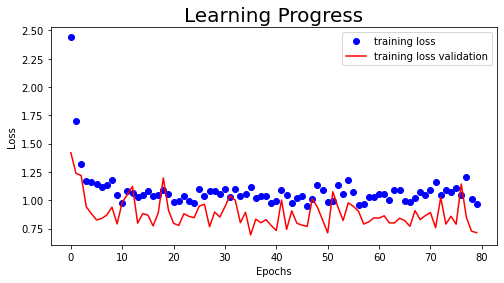

In [18]:
# Plots learning progress
history_dict=history.history
loss_values = history_dict['loss']
val_loss_values=history_dict['val_loss']
plt.figure(figsize=(8, 4))
plt.plot(loss_values,'bo',label='training loss')
plt.plot(val_loss_values,'r',label='training loss validation')
plt.title('Learning Progress', fontsize=20)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Generate Forecasted Returns (y_train_pred and y_test_pred)

In [19]:
y_train_pred_dl = model_dl.predict(X_train)
y_test_pred_dl = model_dl.predict(X_test)


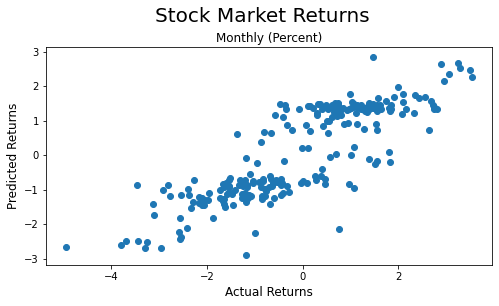

In [20]:
plt.figure(figsize=(8, 4))
plt.scatter(y_test, y_test_pred_dl)
plt.suptitle('Stock Market Returns', y=1.02, fontsize=20)
plt.title('Monthly (Percent)')
plt.xlabel('Actual Returns', fontsize=12)
plt.ylabel('Predicted Returns', fontsize=12)
plt.show()

### R-Square of Forecasted Returns with Actual Returns

In [21]:

print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred_dl)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_test_pred_dl)))

The R2 score on the Train set is:	0.720
The R2 score on the Test set is:	0.708


#### Loss metric using test data

In [22]:
model_dl.evaluate(X_test, y_test)

8/8 [==============================] - 0s 960us/step - loss: 0.7736


0.7735520005226135

# 4. Design Linear Regression Factor Model to Forecast Returns

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

### Linear Regression

In [24]:
model_reg = LinearRegression()

### Train and Test Linear Regression Factor Model

In [25]:
reg = model_reg.fit(X_train, y_train)

Coefficients

In [26]:
reg.coef_

array([2.02250506, 1.40967748])

Intercept

In [27]:
reg.intercept_

0.006451276095187686

### Generate Forecasted Returns (y_train_pred_reg and y_test_pred_reg)

In [28]:
y_train_pred_reg = reg.predict(X_train)
y_test_pred_reg = reg.predict(X_test)

In [29]:
y_test_pred_reg = y_test_pred_reg.reshape(-1,1)

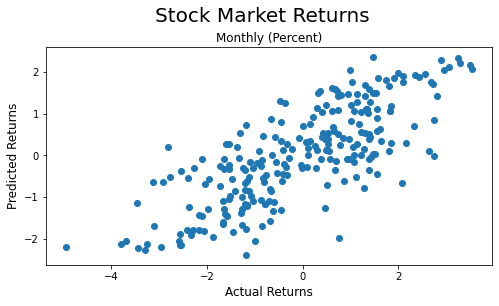

In [30]:
plt.figure(figsize=(8, 4))
plt.scatter(y_test, y_test_pred_reg)
plt.suptitle('Stock Market Returns', y=1.02, fontsize=20)
plt.title('Monthly (Percent)')
plt.xlabel('Actual Returns', fontsize=12)
plt.ylabel('Predicted Returns', fontsize=12)
plt.show()

### R-Square of Forecasted Returns with Actual Returns

In [31]:

print("The R-Square on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred_reg)))
print("The R-Square on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_test_pred_reg)))

The R-Square on the Train set is:	0.526
The R-Square on the Test set is:	0.595


# 5. Comparing Results
### *Deep learning model appears to be more accurate than linear regression model*

### Deep Learning Model

In [32]:
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred_dl)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_test_pred_dl)))

The R2 score on the Train set is:	0.720
The R2 score on the Test set is:	0.708


### Linear Regression Model

In [33]:

print("The R-Square on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred_reg)))
print("The R-Square on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_test_pred_reg)))

The R-Square on the Train set is:	0.526
The R-Square on the Test set is:	0.595
